We will import the necessary libraries that we will use
And after that we will read the file

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("iris.data")
data.head()



,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Because we downloaded the data and we didn't import it from the existing library 'from sklearn import datasets data = datasets.load_iris()'

In [17]:
columns = ['sepal length', 'sepal width','petal length', 'petal width','class']

data = data.set_axis(columns,axis = 1)
data

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


we will print some informations about the dataset and if it has null values

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  149 non-null    float64
 1   sepal width   149 non-null    float64
 2   petal length  149 non-null    float64
 3   petal width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [19]:
#one more extra check to see if it has null values
data.isnull().any()

,0
sepal length,False
sepal width,False
petal length,False
petal width,False
class,False


In [20]:
#now we will see if it has any duplicated values
data.duplicated().sum()

3

we will output the values and we are seeing something interesting

In [21]:
data.loc[data.iloc[:,0:4].duplicated()==True]

,sepal length,sepal width,petal length,petal width,class
33,4.9,3.1,1.5,0.1,Iris-setosa
36,4.9,3.1,1.5,0.1,Iris-setosa
141,5.8,2.7,5.1,1.9,Iris-virginica


because the last row is completely different from the other 2 rows
we will only keep the last row

In [22]:
data.drop_duplicates(inplace=True,keep='last')

In [23]:
data

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


we will do a little bit of descriptive analysis from here on now

In [24]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,146.000000,146.000000,146.000000,146.000000
mean,5.861644,3.052740,3.796575,1.215753
std,0.829562,0.436948,1.753987,0.755822
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


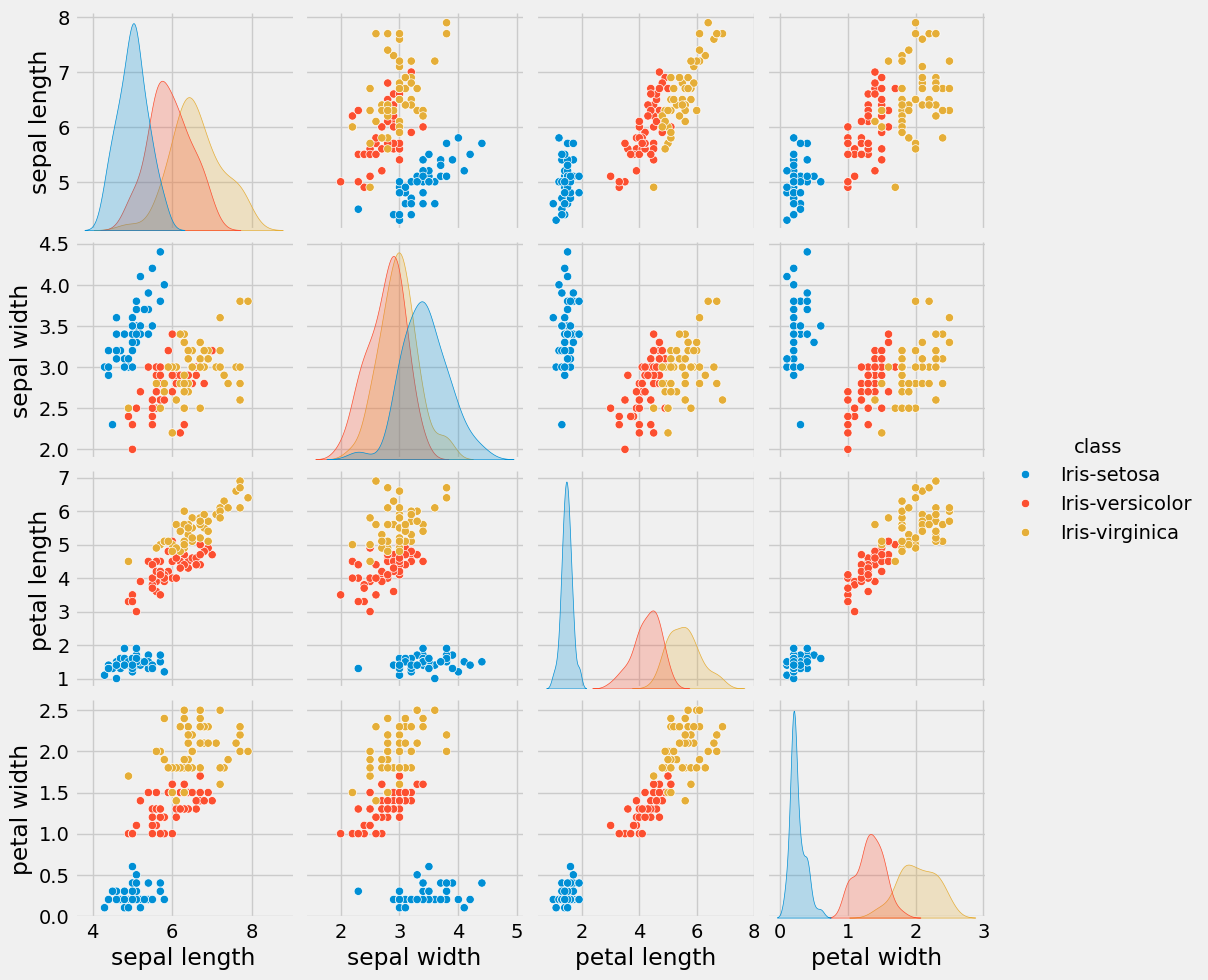

In [25]:
with plt.style.context('fivethirtyeight'):
    sns.pairplot(data,hue='class')

In [26]:
species_map = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
data['class'] = data['class'].map(species_map)

we did another version of categorical encoder (it helps if we don't have a lot of categories)

In [27]:
data

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


below we will check if we have only 3 categories

In [28]:
data['class'].unique()

array([0, 1, 2])

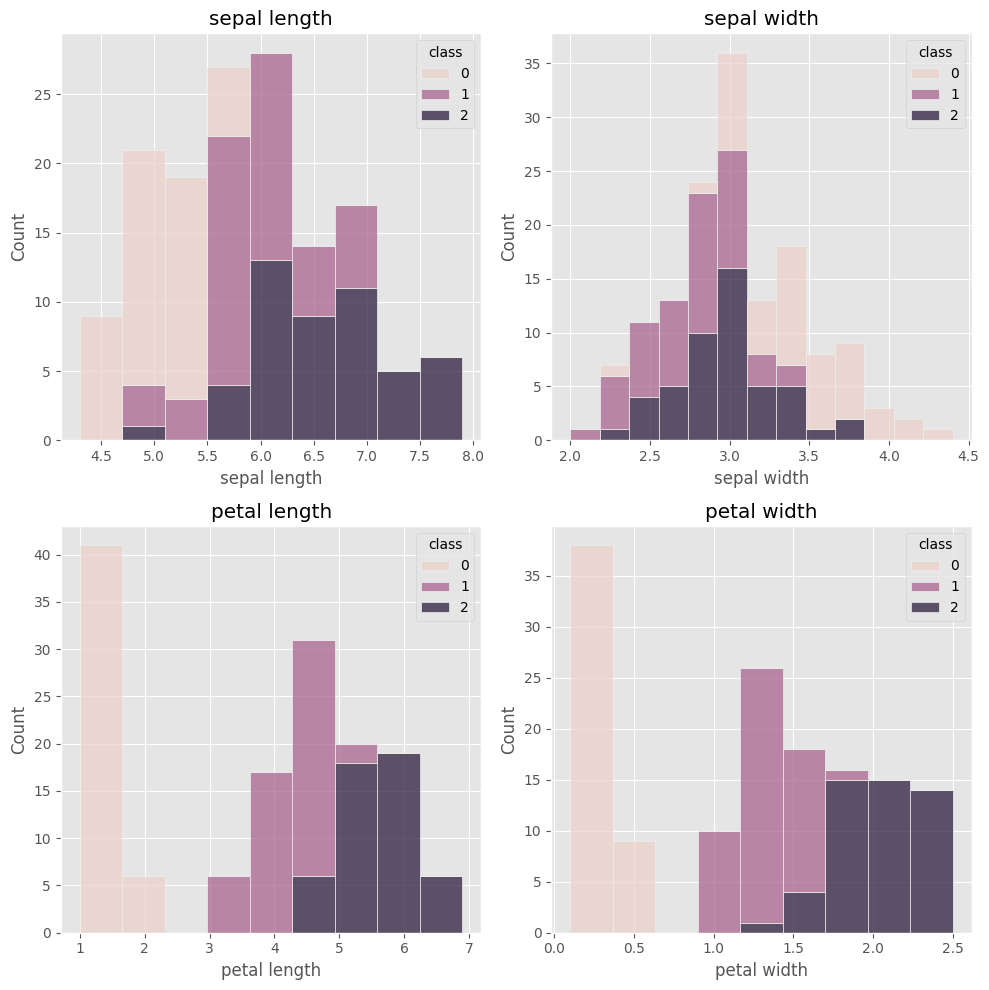

In [29]:
with plt.style.context('ggplot'):
 fig , ax = plt.subplots(2,2,figsize=(10,10))
 sns.histplot(data = data, x = 'sepal length',hue = 'class',multiple='stack', ax = ax[0,0])
 ax[0,0].set_title('sepal length')

 sns.histplot(data=data,x='sepal width',hue='class',multiple='stack',ax=ax[0,1])
 ax[0,1].set_title('sepal width')

 sns.histplot(data=data,x = 'petal length', hue = 'class',multiple= 'stack',ax=ax[1,0])
 ax[1,0].set_title('petal length')

 sns.histplot(data=data,x='petal width',hue = 'class',multiple = 'stack',ax=ax[1,1])
 ax[1,1].set_title('petal width')

 plt.tight_layout()
 plt.show()

we will do a statistical analysis and check if all of the 3 categories
 1. Iris Setosa
 2. Iris Versicolor
 3. Iris Virginica

have the same mean in the below categories
1. Sepal length
2. Sepal width
3. Petal length
4. Petal width



In [30]:
data.groupby('class').mean()

,sepal length,sepal width,petal length,petal width
class,,,,
0,5.008511,3.429787,1.463830,0.251064
1,5.936000,2.770000,4.260000,1.326000
2,6.604082,2.979592,5.561224,2.028571


In [31]:
from scipy.stats import f_oneway


stat_result , p_value =  f_oneway(data[data['class']==0]['sepal length'],data[data['class']==1]['sepal length'],data[data['class']==2]['sepal length'])


if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print('Accept null hypothesis')

Reject null hypothesis


In [32]:
stat_result2 , p_value2 = f_oneway(data[data['class']==0]['sepal width'],data[data['class']==1]['sepal width'],data[data['class']==2]['sepal width'])

if p_value2 < 0.05:
    print("Reject null hypothesis")
else:
    print('Accept null hypothesis')


Reject null hypothesis


In [33]:
stat_result3 , p_value3 = f_oneway(data[data['class']==0]['petal length'],data[data['class']==1]['petal length'],data[data['class']==2]['petal length'])

if p_value3 < 0.05:
    print("Reject null hypothesis")
else:
    print('Accept null hypothesis')

Reject null hypothesis


In [34]:
stat_result4 , p_value4 = f_oneway(data[data['class']==0]['petal width'],data[data['class']==1]['petal width'],data[data['class']==2]['petal width'])

if p_value4 < 0.05:
    print("Reject null hypothesis")
else:
    print('Accept null hypothesis')

Reject null hypothesis


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_new = data.drop(columns = 'class',axis = 1)

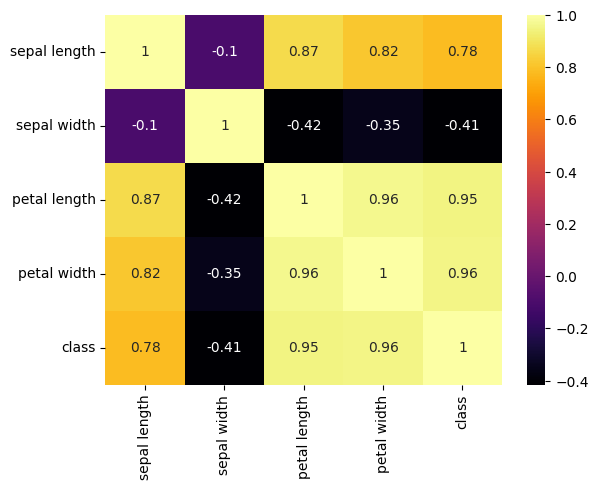

In [36]:
sns.heatmap(data.corr(),annot=True,cmap='inferno')
plt.show()

As we can see from the above correlation plot the sepal width doesn't have good correlation so we will drop it so that we can start the machine learning model

In [37]:
data_new = data_new.drop(columns = 'sepal width')

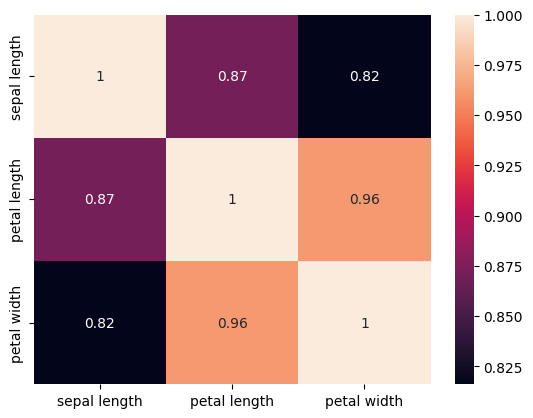

In [38]:
sns.heatmap(data_new.corr(),annot=True)
plt.show()

* training data 80%
* test data 20%


In [61]:
x_train , x_test, y_train , y_test = train_test_split(data_new,data['class'],test_size = 0.2,random_state=5)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((116, 3), (30, 3), (116,), (30,))

In [62]:
y_train

,class
41,0
55,1
79,1
11,0
52,1
...,...
115,2
9,0
75,1
121,2


scaling the data

In [63]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


importing the important metrics for classification

In [64]:
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score as f1
from sklearn.model_selection import cross_val_predict , KFold

def return_metrics(true_classes,predicted_classes):
   results = {
       'Accuracy':accuracy(true_classes,predicted_classes),
       'Recall':recall(true_classes,predicted_classes,average='weighted'),
       'Precision':precision(true_classes,predicted_classes,average = 'weighted'),
       'F1':f1(true_classes,predicted_classes,average = 'weighted')
   }
   return results

importing models for training

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression().fit(x_train,y_train)
svm = SVC().fit(x_train,y_train)
nb = GaussianNB().fit(x_train,y_train)
knn = KNeighborsClassifier(n_neighbors=15).fit(x_train,y_train)


seeing the results

In [76]:
metrics = ['Accuracy','Recall','Precision','F1']
models = {'Logistic Regression':lr,'Support Vector Machine':svm,'Naive Bayes':nb,'K-Nearest Neighbors':knn}
results = {'Logistic Regression-Train':[], 'Logistic Regression-Test':[],
           'Support Vector Machine-Train':[],'Support Vector Machine-Test':[],
           'Naive Bayes-Train':[],'Naive Bayes-Test':[],
           'K-Nearest Neighbors-Train':[],'K-Nearest Neighbors-Test':[]}


for model_name,model in models.items():
 for metric in metrics:
  model_train = return_metrics(y_train,model.predict(x_train))
  model_test = return_metrics(y_test,model.predict(x_test))
  results[f"{model_name}-Train"].append(model_train[metric])
  results[f"{model_name}-Test"].append(model_test[metric])

results = pd.DataFrame(results,index=metrics)
results

,Logistic Regression-Train,Logistic Regression-Test,Support Vector Machine-Train,Support Vector Machine-Test,Naive Bayes-Train,Naive Bayes-Test,K-Nearest Neighbors-Train,K-Nearest Neighbors-Test
Accuracy,0.948276,0.966667,0.956897,0.966667,0.956897,1.0,0.956897,0.966667
Recall,0.948276,0.966667,0.956897,0.966667,0.956897,1.0,0.956897,0.966667
Precision,0.948276,0.969231,0.957094,0.969231,0.957094,1.0,0.957094,0.969231
F1,0.948276,0.966540,0.956889,0.966540,0.956889,1.0,0.956889,0.966540


plotting the results

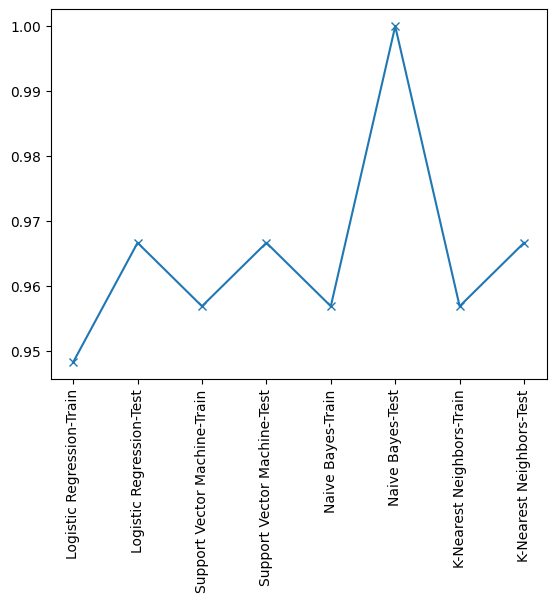

In [ ]:
plt.plot(results.loc['Accuracy'],'-x')
plt.xticks(rotation=90)
plt.show()

**To be sure that our models doesn't have overfitting we will evaluate the models with cross-validation**

In [77]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np



# Define the models to load
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Load each model and evaluate it using cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

for model_name, model in models.items():
    print(f"Evaluating {model_name} with cross-validation...")

    # Load the model from file


    # Perform cross-validation
    accuracy_scores = cross_val_score(model, data_new,data['class'], cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(model, data_new, data['class'], cv=cv, scoring='precision_weighted')
    recall_scores = cross_val_score(model, data_new, data['class'], cv=cv, scoring='recall_weighted')
    f1_scores = cross_val_score(model, data_new, data['class'], cv=cv, scoring='f1_weighted')

    print(f"{model_name} - Accuracy: {np.mean(accuracy_scores):.2f}, Precision: {np.mean(precision_scores):.2f}, Recall: {np.mean(recall_scores):.2f}, F1-Score: {np.mean(f1_scores):.2f}")
    print()

print("Cross-validation evaluation completed.")


Evaluating Logistic Regression with cross-validation...
Logistic Regression - Accuracy: 0.96, Precision: 0.97, Recall: 0.96, F1-Score: 0.96

Evaluating Support Vector Machine with cross-validation...
Support Vector Machine - Accuracy: 0.95, Precision: 0.96, Recall: 0.95, F1-Score: 0.95

Evaluating Naive Bayes with cross-validation...
Naive Bayes - Accuracy: 0.96, Precision: 0.97, Recall: 0.96, F1-Score: 0.96

Evaluating K-Nearest Neighbors with cross-validation...
K-Nearest Neighbors - Accuracy: 0.95, Precision: 0.96, Recall: 0.95, F1-Score: 0.95

Cross-validation evaluation completed.
